<a href="https://colab.research.google.com/github/siwookim1114/Data-Science-Projects/blob/main/USA_Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Dataset Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

## Read Data CSV

In [2]:
# Set filepath
file_path = "/content/drive/MyDrive/ML AI/Mega/데이터분석/데이터/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

# Read csv
df = pd.read_csv(file_path)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [3]:
## DataFrame information extraction
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

**Column Information**:

* Diabetes_binary : Labels in binary whether the surveyor has diabetes or not
  * Diabetes + Having Diabetic Symptoms = 1,
  * No-Diabetes = 0

* HighBP: Indicates High Blood Pressure or Not
  * 0 = Normal Blood Pressure
  * 1 = High Blood Pressure

* HighChol: Indicates High Cholesterol Rate or Not
  * 0 = Normal Cholesterol Rate
  * 1 = High Cholesterol Rate

* CholCheck: Whether the surveyor have checked cholesterol within the past five years
  * 0 = No
  * 1 = Yes

* BMI : Body Mass Index (kg / m^2)
  * BMI >= 25 => Overweight
  * BMI >= 30 => Obese

* Smoker: Whether the surveyor smoked more than 100 cigarettes or not
  * 0 = No
  * 1 = Yes

* Stroke: Have stroke or not?
  * 0 = No
  * 1 = Yes

* HeartDiseasorAttack: Have heart related symptoms or not
  * 0 = No
  * 1 = Yes

* PhysActivity: Whether the surveyor exercised in rececent 30 days
  * 0 = No
  * 1 = Yes

* Fruits: Whether surveyor consumed fruits at least once per day
  * 0 = No
  * 1 = Yes

* Veggies: Whether surveyor consumed vegetables at least once per day
  * 0 = No
  * 1 = Yes

* HvyAlcoholConsump: Whether surveyor consumes alcohol or not based on the criterion:
  * Adult Men >= 14 drinks per week
    * 0 = No
    * 1 = Yes
  * Adult Women >= 7 drinks per week
    * 0 = No
    * 1 = Yes

* AnyHealthcare: Have had any kind of health care coverage?
  * 0 = No
  * 1 = Yes

* NoDocbcCost: Whether the surveyor was not able to see the doctor due to cost in past 12 months
  * 0 = No
  * 1 = Yes

* GenHlth : Surveyor rating their general health level
  * Rate from 1 - 5

* MentHealth: How many days during the past 30 days was meantal health not good?
  * From 0 - 30

* PhysHealth: How many days during the past 30 days was physical health not good?
  * From 0 - 30

* DiffWalk: Have serious difficulty walking or climbing stairs?
  * 0 = No
  * 1 = Yes

* Sex: Indicate sex of surveyor
  * 0 = Female
  * 1 = Male

* Age: Dividing age into fourteen-level age category
  * Age into 1 - 14

* Education: Highest grade or year of school completion
  * From 1 - 6

* Income: Annual household income from all sources
  * From 1 - 8





## Exploratory Data Analysis

In [4]:
### Extracting the column names for indexing
names = df.columns
print(f"Column names: \n{names}")

Column names: 
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


### Analyzing Diabetes Label Column
* The label of diabetes is in binary classification => Could count the distribution of the data

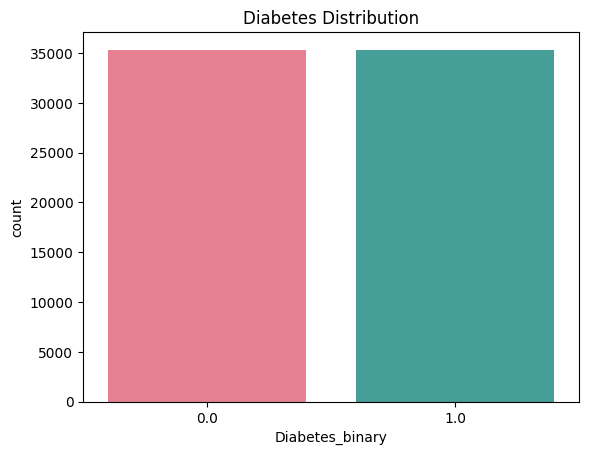

--------------------------------------------------------------------------------
Diabetes Distribution: 
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [5]:
# Visualization
sns.countplot(data = df, x = names[0], palette = "husl")  ## Diabetes_binary
plt.title("Diabetes Distribution")
plt.show()

print("-" * 80)

# Extract Statistics
label_counts = df.loc[:, names[0]].value_counts()
print(f"Diabetes Distribution: \n{label_counts}")

Result: Same number of data distribution for diabetes and non-diabetes

### Feature Analysis

There are 21 columns that could be used to analyze for predicting diabetes. Out of these columns, there will be many columns that are not important to be considered.

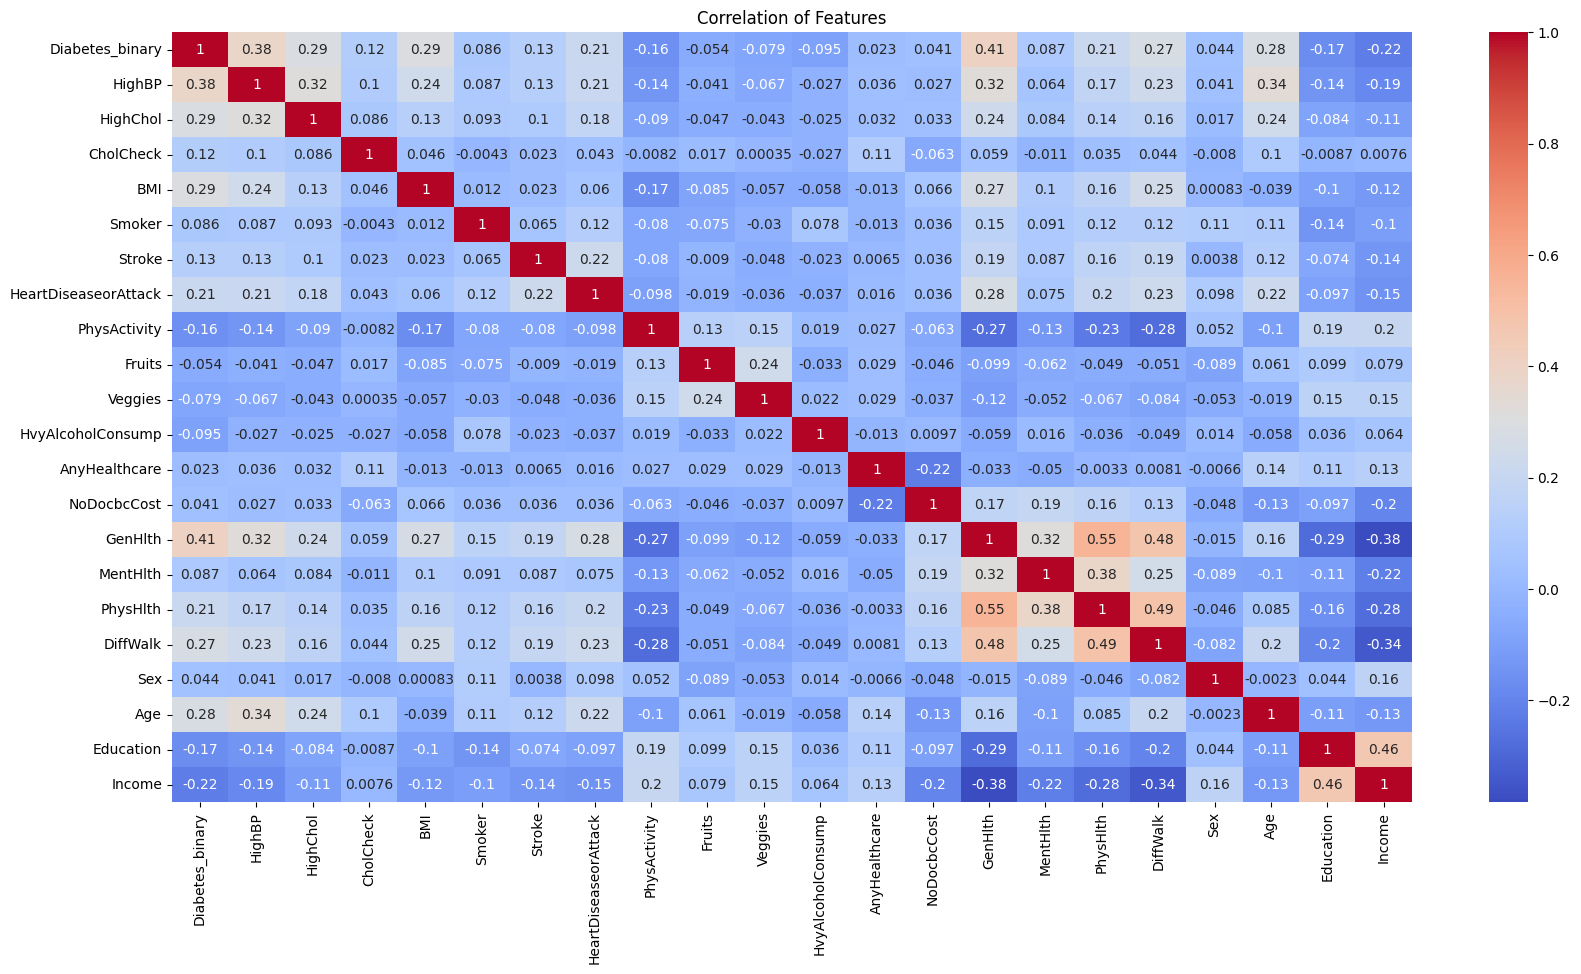

In [6]:
plt.figure(figsize = (20, 10))
sns.heatmap(data = df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation of Features")
plt.show()

From the heatmap, the correlation between the diabetes_binary column and various features could be analyzed. Based on the heatmap, features that have a high correlation coefficient: **HighBP, HighChol, BMI, Age, Education, Income** will be analyzed. In addition, although showing a low correlation, **Sex** will also be further analyzed as studies have been found that "Diabetes, especially type 2, is more common in males rather than females. However, females often have more serious complications and a greater risk of death" (News Medical), showing a discrepancy.

### Diabetes and Blood Pressure Analysis

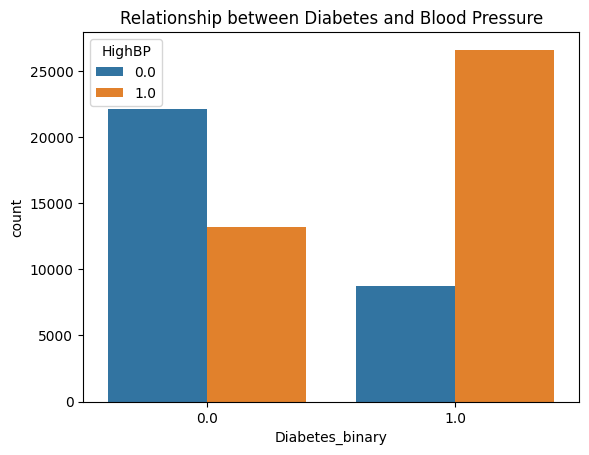

In [7]:
## Visualization on Diabetes and Blood Pressure
sns.countplot(data = df, x = names[0], hue = names[1])
plt.title("Relationship between Diabetes and Blood Pressure")
plt.show()

From the graph, it is shown how for people with non-diabetes, more portion of the people have low blood pressure than high blood pressure. On the other hand, for people with diabetes, more portion of the people have high blood pressure than low blood pressure. This is because "[m]any of the underlying molecular mechanisms, including oxidative stress, inflammation, and fibrosis causing microvascular and macrovascular complications of diabetes, also cause vascular remodelling and dysfunction in hypertension" (**National Institues of Health**). However, it is accurate to analyze the prevalence rate instead of the total counts.

In [8]:
# Statistical Analysis --> Prevalence Analysis

## Extracting the number of people with hypertension among those without diabetes
condition1 = (df.loc[:, names[0]] == 0.0) & (df.loc[:, names[1]] == 1.0) ## People without diabetes and with hypertension
normal_hbp_counts = df.loc[condition1, :].index.size
print(f"Number of people without diabetes and with hypertension: {normal_hbp_counts}")

print("-" * 80)

## Extracting the prevalence of hypertension among those without diabetes
ratio_hbp_without = normal_hbp_counts/label_counts.iloc[0]
print(f"Prevalence of hypertension among people without diabetes: {ratio_hbp_without}")

print("-" * 80)

## Extracting the number of people with hypertension among those with diabetes
condition2 = (df.loc[:, names[0]] == 1.0) & (df.loc[:, names[1]] == 1.0) ## People with diabetes and with hypertension
diabetes_hbp_counts = df.loc[condition2, :].index.size
print(f"Number of people with diabetes and with hypertension: {diabetes_hbp_counts}")

print("-" * 80)

## Extracting the prevalence of hypertension among those with diabetes
ratio_hbp_with = diabetes_hbp_counts/label_counts.iloc[1]
print(f"Prevalence of hypertension among people with diabetes: {ratio_hbp_with}")

Number of people without diabetes and with hypertension: 13228
--------------------------------------------------------------------------------
Prevalence of hypertension among people without diabetes: 0.37424319583545523
--------------------------------------------------------------------------------
Number of people with diabetes and with hypertension: 26604
--------------------------------------------------------------------------------
Prevalence of hypertension among people with diabetes: 0.7526735698523171


### Diabetes and Cholesterol Analysis

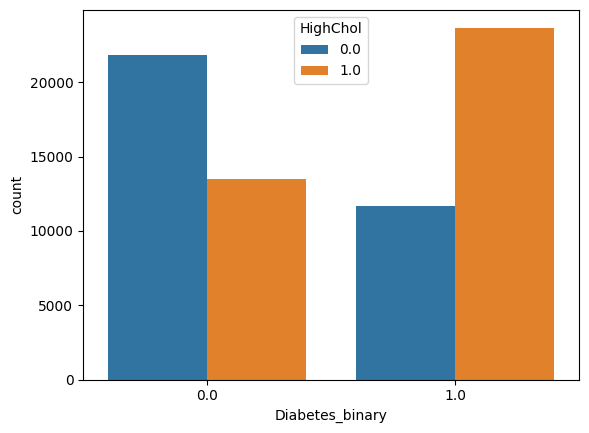

In [9]:
### Visualization on Diabetes and Cholesterol
sns.countplot(data = df, x = names[0], hue = names[2])
plt.show()

From the graph, it is shown how for people with non-diabetes, more portion of the people have low cholesterol rate than high cholesterol rate. On the other hand, for people with diabetes, more portion of the people have high cholesterol rate than low cholesterol rate. Due to diabetic dyslipidemia, diabetes increase trigylecerids and cholesterol levelsincreasing risk of heart disease (**American Heart Association**). The prevalence rate will be analyzed.

In [10]:
### Statistical Analysis --> Prevalence Analysis

# Extracting the number of people with hypercholesterolemia among those without diabetes
condition1 = (df.loc[:, names[0]] == 0.0) & (df.loc[:, names[2]] == 1.0)   ## People without diabetes and with hypercholesterolemia
normal_hchol_counts = df.loc[condition1, :].index.size
print(f"Number of people without diabetes and with hypercholesterolemia: {normal_hchol_counts}")

print("-" * 80)

# Extracting the prevalence of hypercholesterolemia among those without diabetes
ratio_chol_without = normal_hchol_counts/label_counts.iloc[0]
print(f"Prevalence of hypercholesterolemia among people without diabetes: {ratio_chol_without}")

print("-" * 80)

# Extracting the number of people with hypercholesterolemia among those with diabetes
condition2 = (df.loc[:, names[0]] == 1.0) & (df.loc[:, names[2]] == 1.0)  ## People with diabetes and with hypercholesterolemia
diabetes_hchol_counts = df.loc[condition2, :].index.size
print(f"Number of people with diabetes and with hypercholesterolemia: {diabetes_hchol_counts}")

print("-" * 80)

# Extracting the prevalence of hypercholesterolemia among those with diabetes
ratio_chol_with = diabetes_hchol_counts/label_counts.iloc[1]
print(f"Prevalence of hypercholesterolemia among people with diabetes: {ratio_chol_with}")

Number of people without diabetes and with hypercholesterolemia: 13477
--------------------------------------------------------------------------------
Prevalence of hypercholesterolemia among people without diabetes: 0.38128784020822726
--------------------------------------------------------------------------------
Number of people with diabetes and with hypercholesterolemia: 23686
--------------------------------------------------------------------------------
Prevalence of hypercholesterolemia among people with diabetes: 0.6701182594918803


### Diabetes and BMI Analysis

U.S. Criteria for BMI obesity **(National Insitutes of Health)**

* BMI 18.5-24.9 : Normal
* BMI 25-29 : Overweight
* BMI 30 and above : Obese




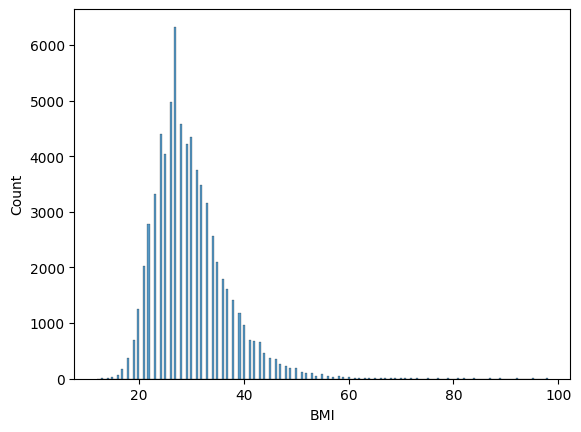

In [11]:
# Visualization of BMI column distribution
sns.histplot(data = df, x = names[4])
plt.show()

In [12]:
# Summary Statistics for the BMI column distribtuion
stats_bmi = df.loc[:, names[4]].describe()
print(f"BMI Summary Statistics: \n{stats_bmi}")

BMI Summary Statistics: 
count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64


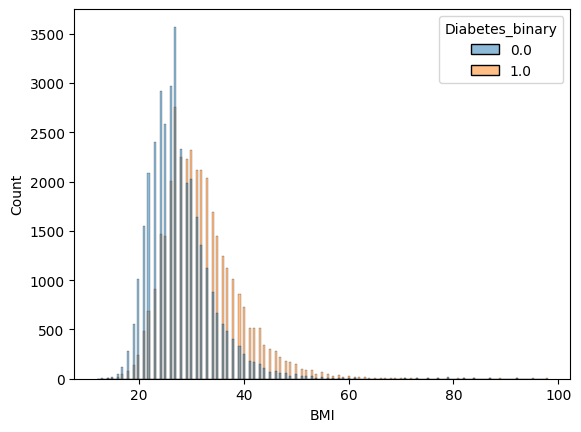

In [13]:
# Visualization on Diabetes and BMI
sns.histplot(data = df, x = names[4], hue = names[0])
plt.show()

As BMI is divided into ranges, histogram plot was used to count the ranges of different BMI by each data. From the graph, it could be analyzed how more data that are skewed towards higher BMI ranges are categorized as diabetes compared to lower BMI ranges. This is also supported by the **National Institutes of Health (NIH)**: "Obesity is a common risk factor for type 2 diabetes. Screening for diabetes is indicated in all patients with obesity. Treating obesity is the cornerstone in the prevention and management of type 2 diabetes". Again, the prevalence rate of diaebtes will also be analyzed.

In [14]:
### Statistical Analysis --> Prevalence Analysis

# Extracting the number of people who have diabetes among people who are not obese
condition1 = (df.loc[:, names[4]] < 30)       ## Not obese
condition2 = (df.loc[:, names[0]] == 1.0)     ## Diabetes
condition_diabetes_notobese = condition1 & condition2
normal_diabetes_counts = df.loc[condition_diabetes_notobese, :].index.size
print(f"Number of people who have diabetes and are not obese: \n{normal_diabetes_counts}")

print("-" * 80)

# Extracting the prevalence rate of diabetes among people who are not obese
ratio_bmi_without = normal_diabetes_counts/len(df.loc[condition1, :].index)
print(f"Prevalence of diabetes among people who are not obese: \n{ratio_bmi_without}")

print("-" * 80)

# Extracting the number of people who have diabetes among people who are obese
condition3 = (df.loc[:, names[4]] >= 30)      ## Obese
condition4 = (df.loc[:, names[0]] == 1.0)     ## Diabetes
condition_diabetes_obese = condition3 & condition4
obese_diabetes_counts = df.loc[condition_diabetes_obese, :].index.size
print(f"Number of people who have diabetes and are obese: \n{obese_diabetes_counts}")

print("-" * 80)

# Extracting the prevalence of people who are obese among those with diabetes
ratio_bmi_with = obese_diabetes_counts/len(df.loc[condition3, :].index)
print(f"Prevalence of diabetes among people are obese: \n{ratio_bmi_with}")

Number of people who have diabetes and are not obese: 
14789
--------------------------------------------------------------------------------
Prevalence of diabetes among people who are not obese: 
0.37680900937627393
--------------------------------------------------------------------------------
Number of people who have diabetes and are obese: 
20557
--------------------------------------------------------------------------------
Prevalence of diabetes among people are obese: 
0.6537654242462791


### Diabetes and Gender Analysis

In [15]:
### Statistical Analysis on Gender Distribution
gender_counts = df.loc[:, names[-4]].value_counts()  ## Sex (Gender)
print(f"Frequency of males and females: \n{gender_counts}")

## 0 = Female, 1 = Male

Frequency of males and females: 
Sex
0.0    38386
1.0    32306
Name: count, dtype: int64


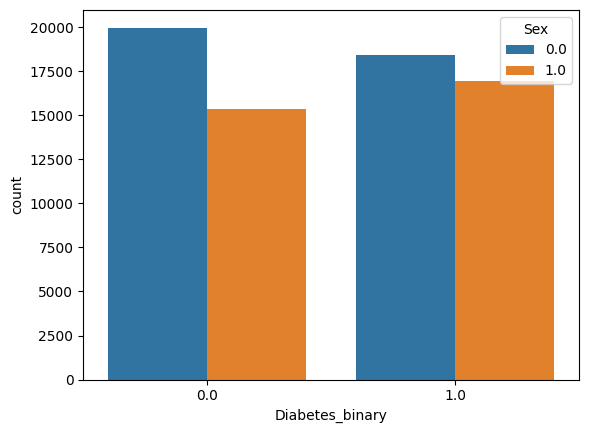

In [16]:
# Visualization on Diabetes and Gender
sns.countplot(data = df, x = names[0], hue = names[-4]) ## Sex (Gender)
plt.show()

From the bargraph, the total counts for diabetic patients is higher for males than females as proved by studies. However, as there is a difference in number sampling, the diabetes prevalence rate will also be calculated again and analyzed.

In [19]:
### Statistical Analysis --> Prevalence Analysis

# Extracting the number of people with diabetes among females
condition = (df.loc[:, names[-4]] == 0.0) & (df.loc[:, names[0]] == 1.0)  ## Females with diabetes (extracting all the corresponding rows)
female_diabetes_counts = df.loc[condition, :].shape[0]
print(f"Number of people with diabetes among females: {female_diabetes_counts}")

print("-" * 80)

# Extracting the prevalence of diabetes among females
ratio_diabetes_females = female_diabetes_counts / gender_counts[0] ## gender_counts.iloc[0]
print(f"Prevalence of diabetes among females: {ratio_diabetes_females}")

print("-" * 80)

# Extracting the number of people with diabetes among males
condition = (df.loc[:, names[-4]] == 1.0) & (df.loc[:, names[0]] == 1.0)
male_diabetes_counts = df.loc[condition, :].shape[0]
print(f"Number of people with diabetes among males: {male_diabetes_counts}")

print("-" * 80)

# Extracting the prevalence of diabetes among males
ratio_diabetes_males = male_diabetes_counts / gender_counts[1]
print(f"Prevalence of diabetes among males: {ratio_diabetes_males}")

Number of people with diabetes among females: 18411
--------------------------------------------------------------------------------
Prevalence of diabetes among females: 0.4796279893711249
--------------------------------------------------------------------------------
Number of people with diabetes among males: 16935
--------------------------------------------------------------------------------
Prevalence of diabetes among males: 0.5242060298396582


### Diabetes and Age Analysis

Categorizing Age Column into 13 Levels
* Level 1: 18 - 24
* Level 2: 25 - 29
* Level 3: 30 - 34
* Level 4: 35 - 39
* Level 5: 40 - 44
* Level 6: 45 - 49
* Level 7: 50 - 54
* Level 8: 55 - 59
* Level 9: 60 - 64
* Level 10: 65 - 69
* Level 11: 70 - 74
* Level 12: 75 - 79
* Level 13: 80 or older


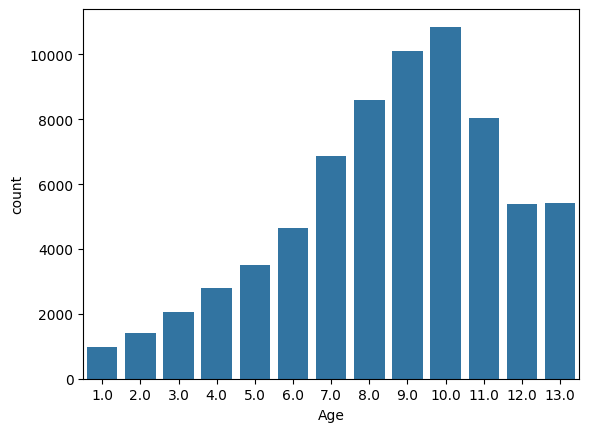

In [20]:
# Visualizing the distribution of the Age column
sns.countplot(data=df, x=names[-3])
plt.show()

In [21]:
### Statistical Analysis of Population by Age Stages
# age_counts = df.loc[:, names[-3]].value_counts().sort_values()  ## sort_values() => Sort in ascending order (opposite of value_counts())
age_counts = df.loc[:, names[-3]].value_counts().sort_index()  ## sort_index() => Sort by index order (ascending)
print(f"Population by age stages: \n{age_counts}")

Population by age stages: 
Age
1.0       979
2.0      1396
3.0      2049
4.0      2793
5.0      3520
6.0      4648
7.0      6872
8.0      8603
9.0     10112
10.0    10856
11.0     8044
12.0     5394
13.0     5426
Name: count, dtype: int64


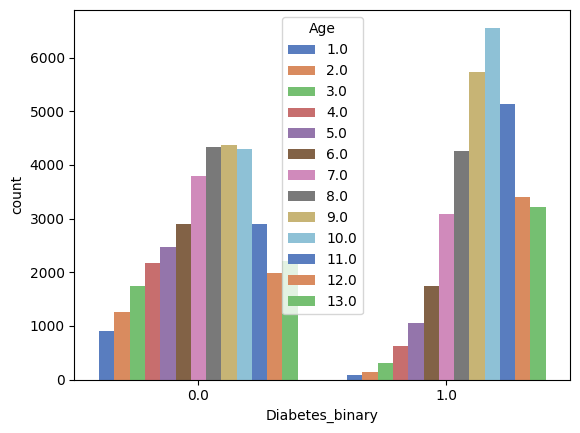

In [22]:
# Visualization of the Relationship between Diabetes and Age columns(1)
sns.countplot(data = df, x = names[0], hue = names[-3], palette = "muted")
plt.show()

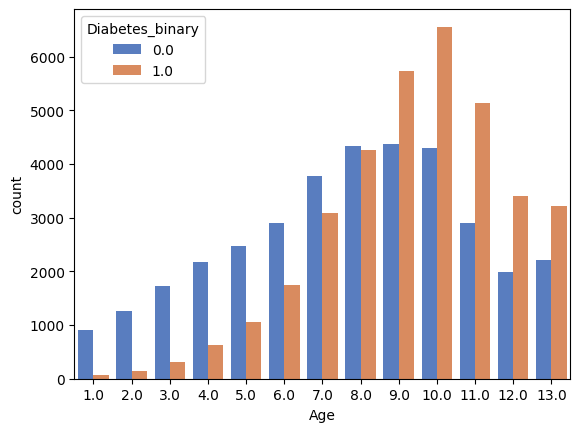

In [23]:
# Visualization of the Relationship Between Diabetes and Age Columns (2)
sns.countplot(data = df, x = names[-3], hue = names[0], palette = "muted")
plt.show()

Population by age stages for diabetic patients: 
Age
1.0       78
2.0      140
3.0      314
4.0      626
5.0     1051
6.0     1742
7.0     3088
8.0     4263
9.0     5733
10.0    6558
11.0    5141
12.0    3403
13.0    3209
Name: count, dtype: int64
--------------------------------------------------------------------------------
Prevalence of diabetes by age stages: 
Age
1.0     0.079673
2.0     0.100287
3.0     0.153245
4.0     0.224132
5.0     0.298580
6.0     0.374785
7.0     0.449360
8.0     0.495525
9.0     0.566950
10.0    0.604090
11.0    0.639110
12.0    0.630886
13.0    0.591412
Name: count, dtype: float64
--------------------------------------------------------------------------------


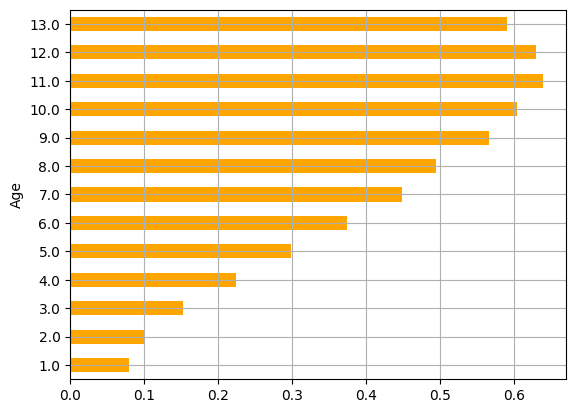

In [24]:
# Extracting the population by age stages for diabetic patients
condition = (df.loc[:, names[0]] == 1.0)
diabetes_age_counts = df.loc[condition, names[-3]].value_counts().sort_index()
print(f"Population by age stages for diabetic patients: \n{diabetes_age_counts}")

print("-" * 80)

# Extracting the prevalence of diabetes by age stages
ratio = diabetes_age_counts / age_counts
print(f"Prevalence of diabetes by age stages: \n{ratio}")

print("-" * 80)

# Visualization of diabetes prevalence by age stages --> Series.plot(kind = "bar")
ratio.plot(kind = "barh", grid = True, color = "orange")
plt.show()

It could be viewed that the diabetes prevalence rate increases from age level 1 (18-24) drastically until age level 11 (70-74), but then starts to drop at age level 12 and 13. This phenomenon have also been proved through studies: "Compared to adults aged 18 to 44 years, incidence rates of diagnosed diabetes were higher among adults aged 45 to 64 years and those aged 65 years and older" (**Centers for Disese Control and Prevention**). Hence increasing diabetes rate is clearly accurate. However, the drop after age 11 conflicts with the studies that have been proved. The main reason for this drop remains unknown and need further investigation. What could be inferred is that it is related to data sampling bias.

### Diabetes and Education Level Analysis

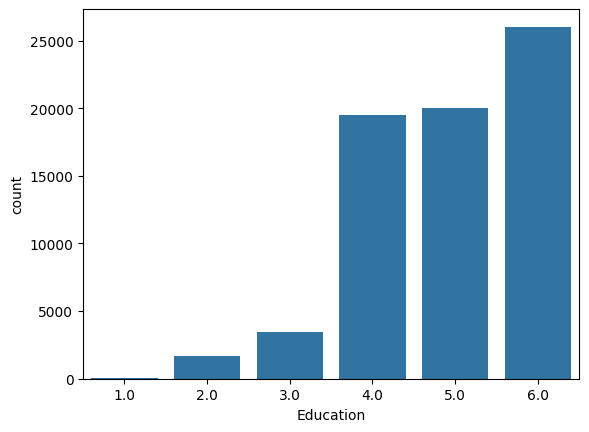

In [25]:
# Visualization of Education Level Column Distribution
sns.countplot(data = df, x = names[-2])   # Education Level
plt.show()

In [26]:
# Statistical Analysis of Population by Education Level
edu_counts = df.loc[:, names[-2]].value_counts().sort_index()
print(f"Population by education level: \n{edu_counts}")

Population by education level: 
Education
1.0       75
2.0     1647
3.0     3447
4.0    19473
5.0    20030
6.0    26020
Name: count, dtype: int64


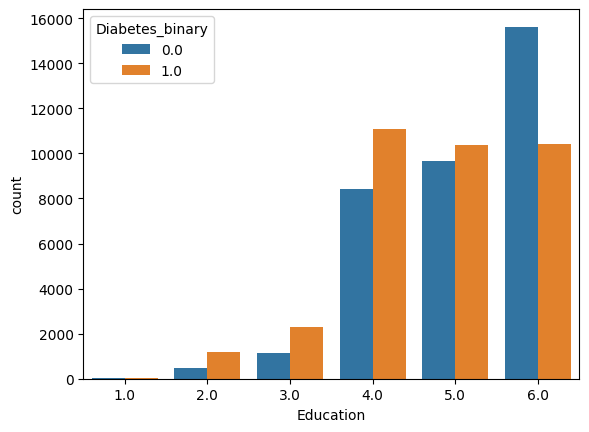

In [27]:
# Visualization of the relationship between Diabetes and Education Level
sns.countplot(data = df, x = names[-2], hue = names[0])
plt.show()

The number of diabetes cases appears to increase with higher education levels on the graph. This is because "[w]ith higher education, diabetes is less likely to develop complications at diagnosis. Lower educational attainment has a higher mortality risk among diabetes" (**ScienceDirect**). To have an accurate analysis, the prevalence rate of diabetes for each education level will be calculated as well.

Population by education level for diabetic patients: 
Education
1.0       47
2.0     1183
3.0     2296
4.0    11066
5.0    10354
6.0    10400
Name: count, dtype: int64
--------------------------------------------------------------------------------
Prevalence of diabetes by education level: 
Education
1.0    0.626667
2.0    0.718276
3.0    0.666086
4.0    0.568274
5.0    0.516925
6.0    0.399693
Name: count, dtype: float64
--------------------------------------------------------------------------------


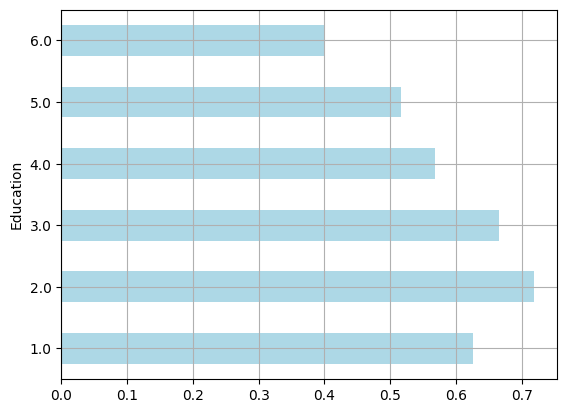

In [28]:
# Statistical Analysis --> Calculation and Visualization of Diabetes Prevalence by Education Level
# Extracting the population by education level for diabetic patients
condition = (df.loc[:, names[0]] == 1.0)   ## Extracting only the number of diabetic patients
diabetes_edu_counts = df.loc[condition, names[-2]].value_counts().sort_index()   ## Number of diabetic patients by education level
print(f"Population by education level for diabetic patients: \n{diabetes_edu_counts}")

print("-" * 80)

# Extracting the prevalence of diabetes by education level
ratio = diabetes_edu_counts / edu_counts   ## Series divided by Series results in the ratio for each level
print(f"Prevalence of diabetes by education level: \n{ratio}")

print("-" * 80)

# Visualization of diabetes prevalence by education level
ratio.plot(kind = "barh", grid = True, color = "lightblue")
plt.show()

Result: As the education level increases, the prevalence rate decreases (except for stage 1 where the sample size is too small for reliable statistics (sampling bias))


### Diabetes and Household Income Level Analysis

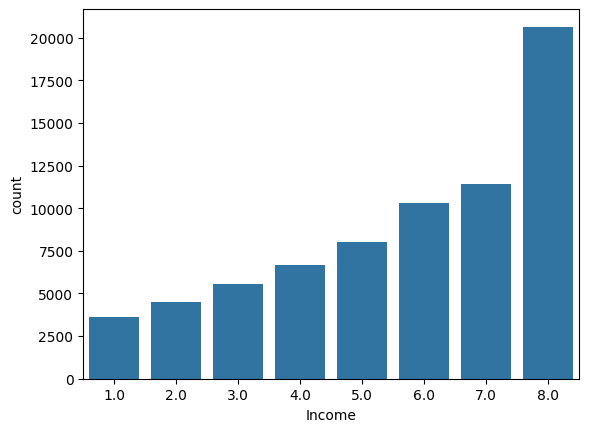

In [29]:
# Visualization of Annual Household Income Column Distribution
sns.countplot(data = df, x = names[-1])
plt.show()

In [30]:
# Statistical Analysis of Population by Annual Household Income Level
income_counts = df.loc[:, names[-1]].value_counts().sort_index()
print(f"Population by annual household income level: \n{income_counts}")

Population by annual household income level: 
Income
1.0     3611
2.0     4498
3.0     5557
4.0     6658
5.0     8010
6.0    10287
7.0    11425
8.0    20646
Name: count, dtype: int64


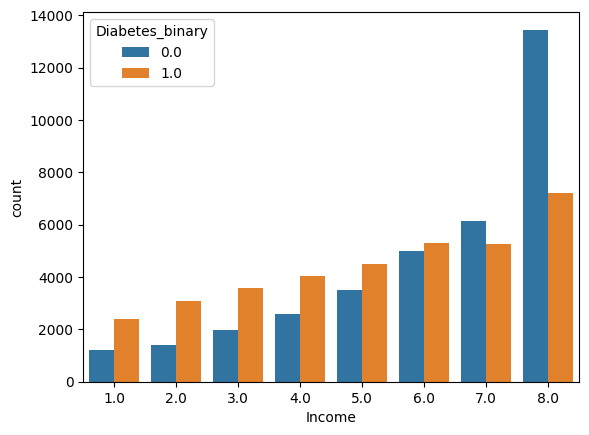

In [31]:
# Analysis of the Relationship Between Diabetes and Annual Household Income Column
sns.countplot(data = df, x = names[-1], hue = names[0])
plt.show()

Population by annual household income level for diabetic patients: 
Income
1.0    2383
2.0    3086
3.0    3568
4.0    4054
5.0    4504
6.0    5291
7.0    5265
8.0    7195
Name: count, dtype: int64
--------------------------------------------------------------------------------
Prevalence of diabetes by annual household income level: 
Income
1.0    0.659928
2.0    0.686083
3.0    0.642073
4.0    0.608892
5.0    0.562297
6.0    0.514338
7.0    0.460832
8.0    0.348494
Name: count, dtype: float64
--------------------------------------------------------------------------------


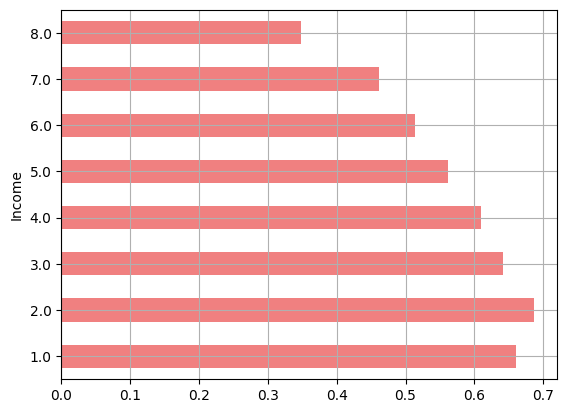

In [32]:
# Statistical Analysis -> Calculation and Visualization of Diabetes Prevalence by Annual Household Income Level

# Extracting the population by annual household income level for diabetic patients
condition = (df.loc[:, names[0]] == 1.0)   ## Extracting only the number of diabetic patients
diabetes_income_counts = df.loc[condition, names[-1]].value_counts().sort_index()   ## Number of diabetic patients by income level
print(f"Population by annual household income level for diabetic patients: \n{diabetes_income_counts}")

print("-" * 80)

# Extracting the prevalence of diabetes by annual household income level
ratio = diabetes_income_counts / income_counts
print(f"Prevalence of diabetes by annual household income level: \n{ratio}")

print("-" * 80)

# Visualization of diabetes prevalence by annual household income level
ratio.plot(kind = "barh", grid = True, color = "lightcoral")
plt.show()


Starting from income level 2, the bar graph shows how diabetes prevalence rate steadily decreases from income level 2 to income level 8. The relationship between household income level and diabetes rate have also been proved in the studies by **National Institutes of Health** : The results of the present study show the prevalence of diabetes to be inversely and strongly related to household income. It was found that 9.0 % of those who had a household income of 29,999 USD per year or less had diabetes, when compared to 4.3 % of those who made between 30,000 and 79,999 USD, and only 2.7 % of those who made more than 80,000 USD".

### Applying Results for Data Anlysis

In [33]:
# Predicting number of diabetic patients with low diabetes probability conditions
condition1 = (df.loc[:, names[1]] == 0.0)    ## No hypertension
condition2 = (df.loc[:, names[2]] == 0.0)    ## No hypercholesterolemia
condition3 = (df.loc[:, names[4]] < 30)      ## BMI less than 30
condition4 = (df.loc[:, names[-4]] == 0.0)   ## Female
condition5 = (df.loc[:, names[-3]] < 4)      ## Age category less than 4 (less than 35 years old)
condition6 = (df.loc[:, names[-2]] == 6.0)   ## Highest education level
condition7 = (df.loc[:, names[-1]] == 8.0)   ## Highest income level
condition = condition1 & condition2 & condition3 & condition4 & condition5 & condition6 & condition7
ratio_highprob_normal = df.loc[condition, names[0]].value_counts(normalize = True)
print(ratio_highprob_normal)

Diabetes_binary
0.0    0.962963
1.0    0.037037
Name: proportion, dtype: float64


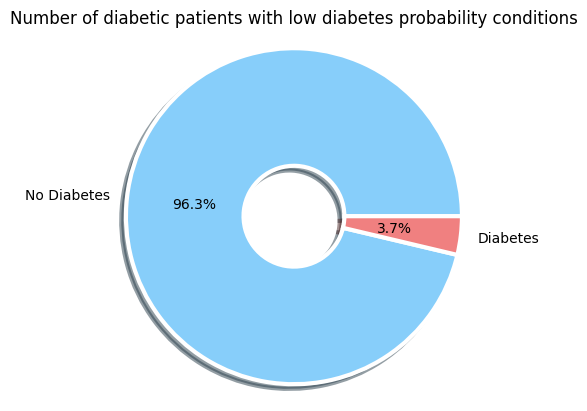

In [34]:
# Pieplot
ratio = ratio_highprob_normal
colors = ["lightskyblue", "lightcoral"]
labels = ["No Diabetes", "Diabetes"]
wedgeprops = {"width" : 0.7, "edgecolor" : "white", "linewidth" : 3}

plt.pie(x = ratio, labels = labels, colors = colors, autopct = "%.1f%%", wedgeprops = wedgeprops, shadow = True)
plt.axis("equal")
plt.title("Number of diabetic patients with low diabetes probability conditions")
plt.show()

In [35]:
# Predicting number of diabetic patients with high diabetes probability conditions
condition1 = (df.loc[:, names[1]] == 1.0)    ## Has hypertension
condition2 = (df.loc[:, names[2]] == 1.0)    ## Has hypercholesterolemia
condition3 = (df.loc[:, names[4]] >= 30)     ## BMI 30 or above
condition4 = (df.loc[:, names[-4]] == 1.0)   ## Male
condition5 = (df.loc[:, names[-3]] >= 4)     ## Age category 4 or above (35 years old or older)
condition6 = (df.loc[:, names[-2]] < 5.0)    ## Education level less than 5
condition7 = (df.loc[:, names[-1]] < 6.0)    ## Income level less than 6
condition = condition1 & condition2 & condition3 & condition4 & condition5 & condition6 & condition7
ratio_highprob_diabetes = df.loc[condition, names[0]].value_counts(normalize = True)
print(ratio_highprob_diabetes)

Diabetes_binary
1.0    0.843771
0.0    0.156229
Name: proportion, dtype: float64


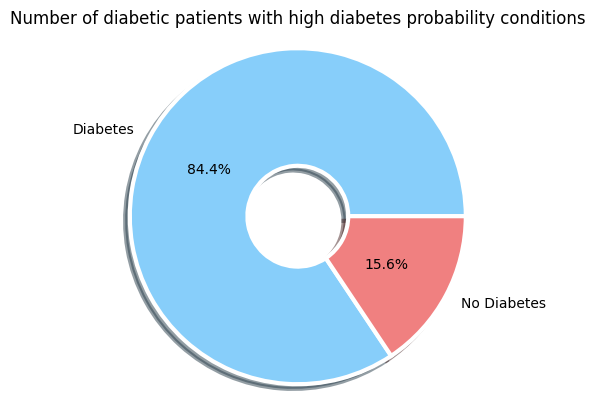

In [36]:
# Pieplot
ratio = ratio_highprob_diabetes
colors = ["lightskyblue", "lightcoral"]
labels = ["Diabetes", "No Diabetes"]
wedgeprops = {"width" : 0.7, "edgecolor" : "white", "linewidth" : 3}

plt.pie(x = ratio, labels = labels, colors = colors, autopct = "%.1f%%", wedgeprops = wedgeprops, shadow = True)
plt.axis("equal")
plt.title("Number of diabetic patients with high diabetes probability conditions")
plt.show()

## Modeling

### Train Data Sets and Test Data Sets

In [37]:
# Splitting the Entire Dataset into Training and Testing Sets (80:20 Ratio)

# Create X_data
X_data = df.drop(columns = names[0]) # Drop Diabetes Binary Column

# Create y_data
y_data = df.loc[:, names[0]]         # Only use Diabetes Binary Column

# Create datasets
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y_data)


In [38]:
# Checking train data
# Checking the indices of X_train
print(X_train.index)

print("-" * 80)

# Checking the indices of y_train
print(y_train.index)

Index([35369, 40967, 27238, 50582, 38854, 49562, 23991, 13093, 25789, 45889,
       ...
       23615,  6543, 38363, 45899, 65393, 22335,  7166, 66883, 36604, 27209],
      dtype='int64', length=56553)
--------------------------------------------------------------------------------
Index([35369, 40967, 27238, 50582, 38854, 49562, 23991, 13093, 25789, 45889,
       ...
       23615,  6543, 38363, 45899, 65393, 22335,  7166, 66883, 36604, 27209],
      dtype='int64', length=56553)


### Decision Tree Modeling

#### Train Model

In [39]:
# Create Model
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Decision Visualization

In [40]:
# Extracting the Maximum Depth of the Decision Tree from the Trained Model
max_depth = dt.get_depth()
print(f"Maximum depth of the trained model: {max_depth}")

Maximum depth of the trained model: 37


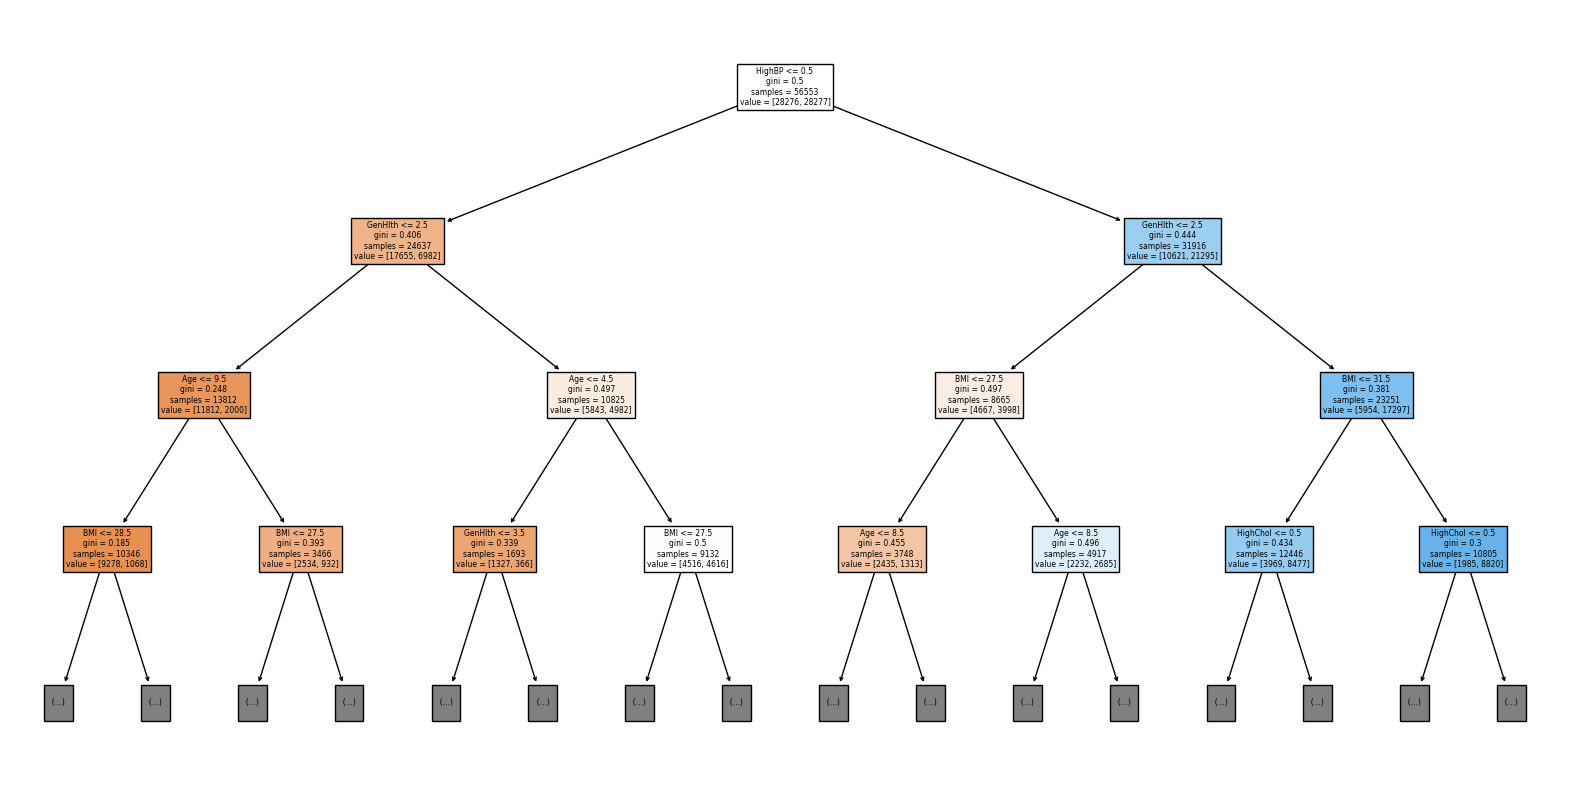

In [41]:
# Resize the image
plt.figure(figsize = (20, 10))

# Visualization
plot_tree(decision_tree = dt, max_depth = 3, feature_names = X_train.columns, filled = True)
plt.show()


#### Making Predictions

In [42]:
# Predictions using the training data
pred_train = dt.predict(X_train)
print(f"Predictions for the training data: {pred_train}")

print("-" * 80)

# Predictions using the testing data
pred_test = dt.predict(X_test)
print(f"Predictions for the testing data: {pred_test}")

Predictions for the training data: [1. 1. 0. ... 1. 1. 0.]
--------------------------------------------------------------------------------
Predictions for the testing data: [0. 0. 0. ... 1. 1. 0.]


#### First Evaluation

In [43]:
# Evaluate performance on train data
performance_train = classification_report(y_train, pred_train)

# Display results
print(f"Performance evaluation for Training Data: \n{performance_train}")

print("-" * 80)

# Evaluate performance on test data
performance_test = classification_report(y_test, pred_test)

# Display results
print(f"Performance evaluation for Testing Data: \n{performance_test}")

Performance evaluation for Training Data: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     28276
         1.0       1.00      0.99      1.00     28277

    accuracy                           1.00     56553
   macro avg       1.00      1.00      1.00     56553
weighted avg       1.00      1.00      1.00     56553

--------------------------------------------------------------------------------
Performance evaluation for Testing Data: 
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66      7070
         1.0       0.66      0.64      0.65      7069

    accuracy                           0.65     14139
   macro avg       0.65      0.65      0.65     14139
weighted avg       0.65      0.65      0.65     14139



#### Hyperparameter Tuning using GridSearch

In [45]:
# Set the parameters and search conditions for optimization
params = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10]}   ## max_depth tuning
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)  ## k-fold cross validation

# Call and create the GridSearchCV search model
grid_dt = GridSearchCV(estimator = dt,
                       param_grid = params,
                       scoring = "accuracy",
                       cv = kfold)

## Train search model
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [46]:
# Result for optimized max_depth hyperparameter that shows the best performance
print(grid_dt.best_params_)

# Optimized max depth = 7

{'max_depth': 7}


In [47]:
# Checking the best performance on validation data
print(grid_dt.best_score_)

0.7407210651728194


Shows performance accuracy of 74%

#### Train Optimized Model

In [48]:
# Train optimized model
best_dt = DecisionTreeClassifier(max_depth = 7, random_state = 0)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

#### Final Evaluation

In [49]:
# Making predictions of test data
pred_test_dt = best_dt.predict(X_test)

In [50]:
# Evaluate performance on test data
performance_test_dt = classification_report(y_test, pred_test_dt, output_dict = True)
df_dt = pd.DataFrame(performance_test_dt).transpose()

# Display results
print(f"Performance Evaluation for Decision Tree Test Data: \n")
df_dt

Performance Evaluation for Decision Tree Test Data: 



,precision,recall,f1-score,support
0.0,0.748001,0.727581,0.737650,7070.000000
1.0,0.734784,0.754845,0.744679,7069.000000
accuracy,0.741212,0.741212,0.741212,0.741212
macro avg,0.741392,0.741213,0.741165,14139.000000
weighted avg,0.741393,0.741212,0.741164,14139.000000


### Random Forest Modeling

#### Train Model

In [51]:
# Create Model
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

#### Hyperparameter Tuning using GridSearch

In [ ]:
# Set parameters and search conditions for optimization
params = {"n_estimators": [100, 200, 300, 400],  ## Number of decision trees to use (default: 100 trees)
          "max_depth": [5, 6, 7, 8, 9]}

# Create cross-validation model
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# Optimize hyperparameters
grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params,
                       scoring = "accuracy",
                       cv = kfold)

# Train search model
grid_rf.fit(X_train, y_train)

In [ ]:
# Result for optimized number of trees and tmax_depth hyperparameters that shows the best performance
print(grid_rf.best_params_)

{'max_depth': 9, 'n_estimators': 100}


In [ ]:
# Checking the best performance on validation data
print(grid_rf.best_score_)

0.749792179799466


#### Train Optimized Model

In [52]:
# Train optimized model
best_rf = RandomForestClassifier(max_depth = 9,
                                 n_estimators = 100,
                                 random_state = 0)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=0)

#### Evaluation

In [53]:
# Making predictions of test data
pred_test_rf = best_rf.predict(X_test)

In [54]:
# Evaluate performance on test data
performance_test_rf = classification_report(y_test, pred_test_rf, output_dict = True)
df_rf = pd.DataFrame(performance_test_rf).transpose()

# Display results
print(f"Performance Evaluation for Random Forest Test Data: \n")
df_rf

Performance Evaluation for Random Forest Test Data: 



,precision,recall,f1-score,support
0.0,0.769114,0.717115,0.742205,7070.000000
1.0,0.734994,0.784694,0.759031,7069.000000
accuracy,0.750902,0.750902,0.750902,0.750902
macro avg,0.752054,0.750904,0.750618,14139.000000
weighted avg,0.752055,0.750902,0.750617,14139.000000


### LightGBM Classifier Modeling

#### Train Model

In [55]:
# Create Model
base_lgbm = LGBMClassifier(random_state = 0,
                           bagging_seed = 0,
                           feature_fraction_seed = 0,
                           data_random_seed = 0,
                           drop_seed = 0,
                           verbose = -1)

#### Hyperparameter Tuning using GridSearch

In [ ]:
# Set parameters and search conditions for optimization
params = {"n_estimators": [50, 100, 200, 300],
          "learning_rate": [0.05, 0.1, 0.5],
          "max_depth": [3, 4, 5]}

# Create cross-validation model
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# Create the search model
grid_lgbm = GridSearchCV(
    estimator = base_lgbm,
    param_grid = params,
    scoring = "accuracy",
    cv = kfold
)

# Train search model
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMClassifier(bagging_seed=0, data_random_seed=0,
                                      drop_seed=0, feature_fraction_seed=0,
                                      random_state=0, verbose=-1),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Result for optimized number of trees, max_depth, and learning rate hyperparameters that shows the best performance
print(grid_lgbm.best_params_)

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}


In [ ]:
# Checking the best performance on validation data
print(grid_lgbm.best_score_)

0.7537884226687619


#### Train Optimized Model

In [56]:
# Train optimized model
best_lgbm = LGBMClassifier(
    n_estimators = 300,
    learning_rate = 0.05,
    max_depth = 4,
    random_state = 0,
    bagging_seed = 0,
    feature_fraction_seed = 0,
    data_random_seed = 0,
    drop_seed = 0,
    verbose = -1
)

best_lgbm.fit(X_train, y_train)

LGBMClassifier(bagging_seed=0, data_random_seed=0, drop_seed=0,
               feature_fraction_seed=0, learning_rate=0.05, max_depth=4,
               n_estimators=300, random_state=0, verbose=-1)

#### Evaluation

In [57]:
# Making predictions of test data
pred_test_lgbm = best_lgbm.predict(X_test)

In [58]:
# Evaluate performance on test data
performance_test_lgbm = classification_report(y_test, pred_test_lgbm, output_dict = True)
df_lgbm = pd.DataFrame(performance_test_lgbm).transpose()

# Display results
print(f"Performance Evaluation for LightGBM Test Data: \n")
df_lgbm

Performance Evaluation for LightGBM Test Data: 



,precision,recall,f1-score,support
0.0,0.774836,0.720368,0.746610,7070.000000
1.0,0.738699,0.790635,0.763785,7069.000000
accuracy,0.755499,0.755499,0.755499,0.755499
macro avg,0.756768,0.755501,0.755198,14139.000000
weighted avg,0.756769,0.755499,0.755197,14139.000000


### XGBoost Classifier Modeling

#### Train Model

In [59]:
# Create Model
base_xgb = XGBClassifier(random_state = 0)

#### Hyperparameter Tuning using GridSearch

In [ ]:
# Set parameters and search conditions for optimization
params = {"n_estimators": [50, 100, 200, 300],
          "learning_rate": [0.05, 0.1, 0.5],
          "max_depth": [3, 4, 5]}

# Create cross-validation model
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# Create the search model
grid_xgb = GridSearchCV(
    estimator = base_xgb,
    param_grid = params,
    scoring = "accuracy",
    cv = kfold
)

# Train and evaluate the search model
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Result for optimized number of trees, max_depth, and learning rate hyperparameters that shows the best performance
print(grid_xgb.best_params_)

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
# Checking the best performance on validation data
print(grid_xgb.best_score_)

0.7541951470759863


#### Train Optimized Model

In [60]:
# Train optimized model
best_xgb = XGBClassifier(learning_rate = 0.05,
                         max_depth = 4,
                         n_estimators = 200,
                         random_state = 0)

best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

#### Evaluation

In [61]:
# Making predictions of test data
pred_test_xgb = best_xgb.predict(X_test)

In [62]:
# Evaluate performance on test data
performance_test_xgb = classification_report(y_test, pred_test_xgb, output_dict = True)
df_xgb = pd.DataFrame(performance_test_xgb).transpose()

# Display results
print(f"Performance Evaluation for XGBoost Test Data: \n")
df_xgb

Performance Evaluation for XGBoost Test Data: 



,precision,recall,f1-score,support
0.0,0.774120,0.718388,0.745213,7070.000000
1.0,0.737266,0.790352,0.762887,7069.000000
accuracy,0.754367,0.754367,0.754367,0.754367
macro avg,0.755693,0.754370,0.754050,14139.000000
weighted avg,0.755694,0.754367,0.754049,14139.000000


### Results and Analysis

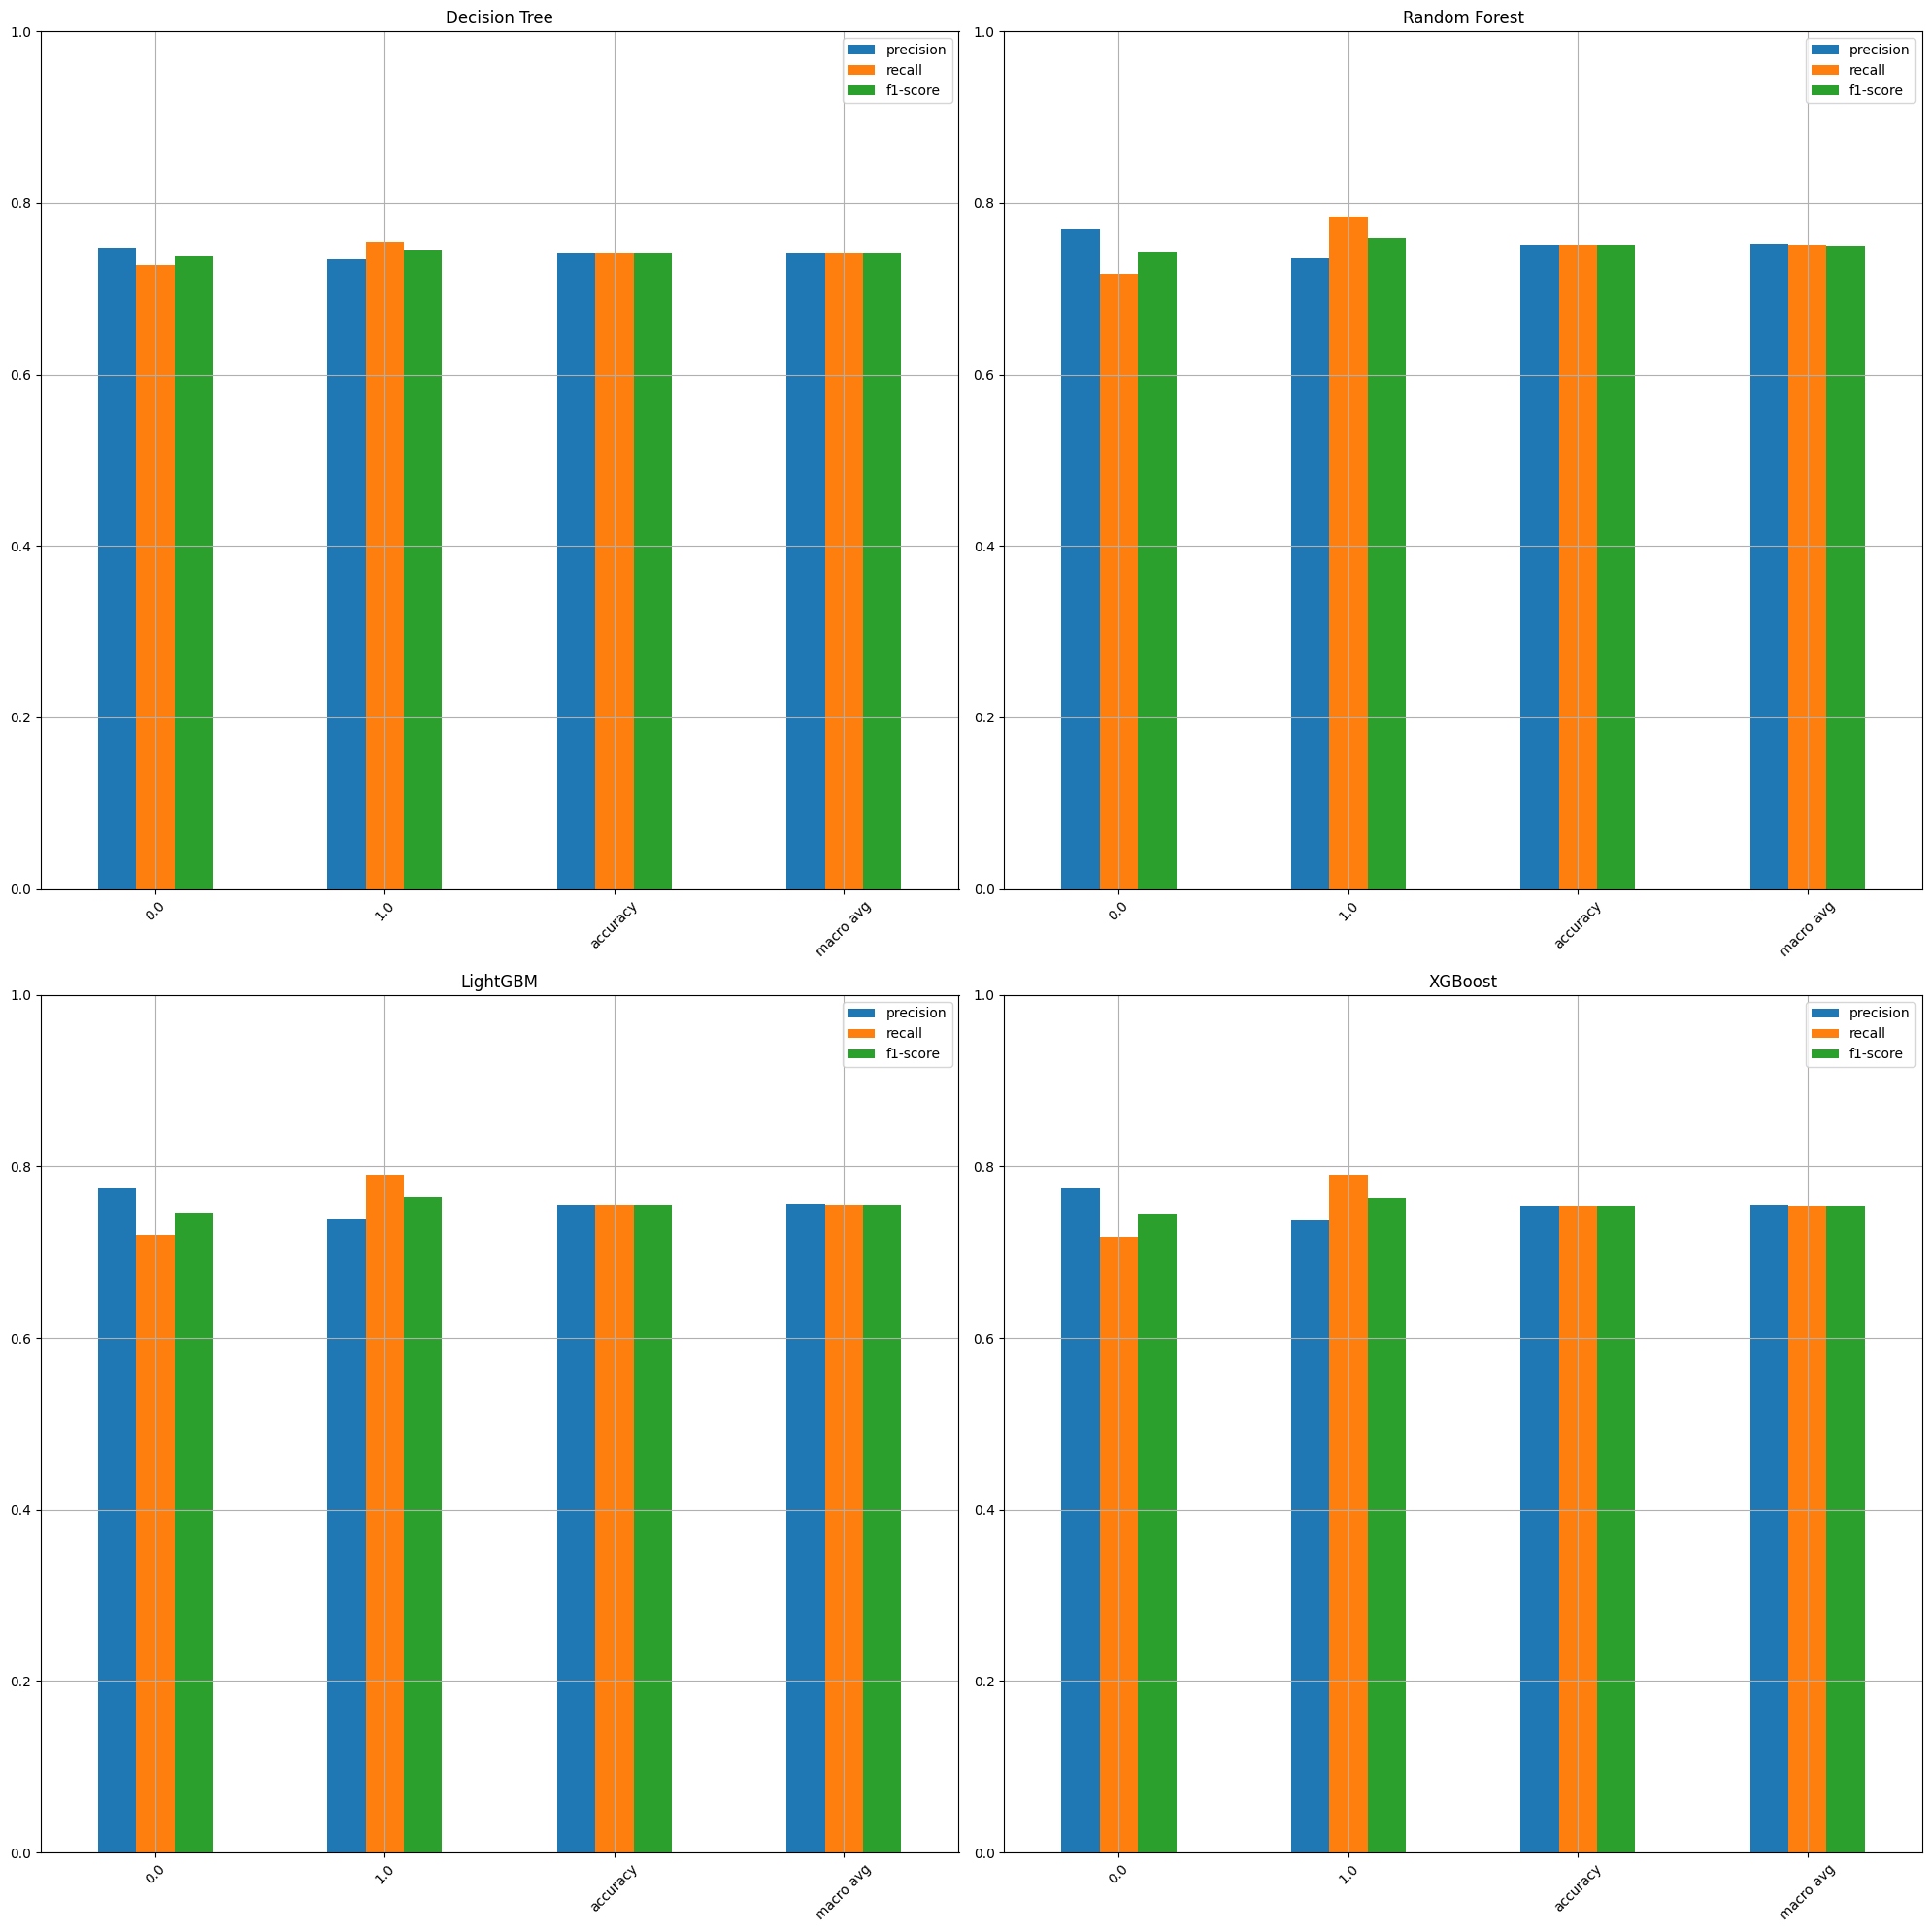

In [63]:
# List of DataFrames and model names
dfs = [df_dt, df_rf, df_lgbm, df_xgb]
model_names = ["Decision Tree", "Random Forest", "LightGBM", "XGBoost"]

# Plotting Classification Reports
fig , axes = plt.subplots(2, 2, figsize = (20, 20))
axes = axes.flatten()

for ax, df, name in zip(axes, dfs, model_names):
  df.iloc[:-1, :-1].plot(kind = "bar", ax = ax, ylim = (0, 1), title = name)
  ax.set_xticklabels(df.index[:-1], rotation = 45)
  ax.grid(True)

plt.tight_layout()
plt.show()

In [75]:
# Concatenate Evaluation DataFrame
df_dt["Model"] = "Decision Tree"
df_rf["Model"] = "Random Forest"
df_lgbm["Model"] = "LightGBM"
df_xgb["Model"] = "XGBoost"

evaluation = pd.concat([df_dt, df_rf, df_lgbm, df_xgb], axis = 0)
evaluation

,precision,recall,f1-score,support,Model
0.0,0.748001,0.727581,0.737650,7070.000000,Decision Tree
1.0,0.734784,0.754845,0.744679,7069.000000,Decision Tree
accuracy,0.741212,0.741212,0.741212,0.741212,Decision Tree
macro avg,0.741392,0.741213,0.741165,14139.000000,Decision Tree
weighted avg,0.741393,0.741212,0.741164,14139.000000,Decision Tree
0.0,0.769114,0.717115,0.742205,7070.000000,Random Forest
1.0,0.734994,0.784694,0.759031,7069.000000,Random Forest
accuracy,0.750902,0.750902,0.750902,0.750902,Random Forest
macro avg,0.752054,0.750904,0.750618,14139.000000,Random Forest
weighted avg,0.752055,0.750902,0.750617,14139.000000,Random Forest


In [81]:
evaluation_f1 = evaluation.sort_values(by = "f1-score", ascending = False)
evaluation_f1

,precision,recall,f1-score,support,Model
1.0,0.738699,0.790635,0.763785,7069.000000,LightGBM
1.0,0.737266,0.790352,0.762887,7069.000000,XGBoost
1.0,0.734994,0.784694,0.759031,7069.000000,Random Forest
accuracy,0.755499,0.755499,0.755499,0.755499,LightGBM
macro avg,0.756768,0.755501,0.755198,14139.000000,LightGBM
weighted avg,0.756769,0.755499,0.755197,14139.000000,LightGBM
accuracy,0.754367,0.754367,0.754367,0.754367,XGBoost
macro avg,0.755693,0.754370,0.754050,14139.000000,XGBoost
weighted avg,0.755694,0.754367,0.754049,14139.000000,XGBoost
accuracy,0.750902,0.750902,0.750902,0.750902,Random Forest


From the evaluation metrics table, *LightGBM* model has the highest overall f1-score and accuracy for predicting diabetes. Hence it could be concluded that the LightGBM LGBMClassifier model is the best performing model.

This source could be used as secondary source for further studies and analysis improvements. Due to GPU hardware constraints, the hyperparameters for these models were tuned to only a certain degree. If available, more parameters could be tuned widely and other algorithms models such as *K-Nearest Neighbours* or *SVM (Support Vector Machines)* could also be used as well to see their performance. However, based on the number of data and features, it is highly likely that neither of the model will outperform the LightGBM model. Hence to increase the overall performance score, more in-depth hyperparameter tuning could be a better choice.